In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/bread basket.csv")

In [3]:
df.shape

(20507, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
# Format data waktu
df['date_time'] = pd.to_datetime(df['date_time'], format= "%d-%m-%Y %H:%M")

In [7]:
df["month"] = df['date_time'].dt.month
df["day"] = df['date_time'].dt.weekday
df["hour"] = df['date_time'].dt.hour

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
 5   month            20507 non-null  int64         
 6   day              20507 non-null  int64         
 7   hour             20507 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [9]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


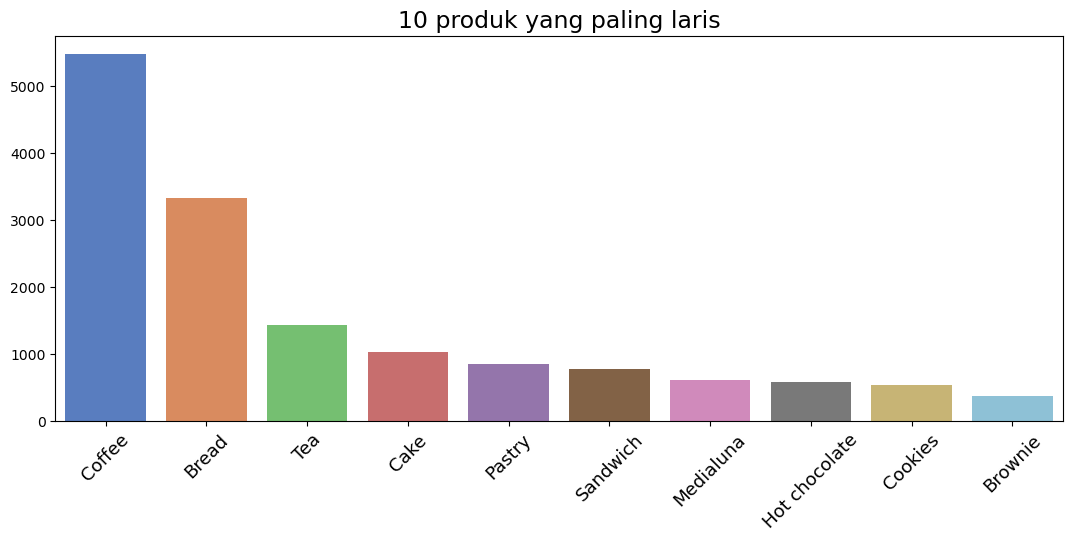

In [10]:
# menampilkan 10 item paling laris
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = df["Item"].value_counts()[:10].index,
            y = df["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size =13, rotation = 45)
plt.title('10 produk yang paling laris', size=17)
plt.show()

Text(0.5, 1.0, 'Jumlah transaksi tiap bulan dari oktober - april')

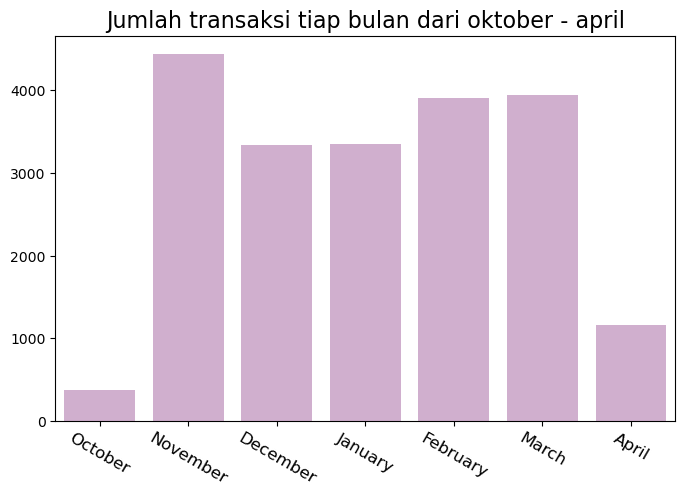

In [11]:
# transaksi tiap bulan

data_perbulan = df.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x=["October", "November", "December", "January", "February", "March", "April"],
    y=data_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("Jumlah transaksi tiap bulan dari oktober - april", size = 16)

Text(0.5, 1.0, 'Total Transaksi per Hari')

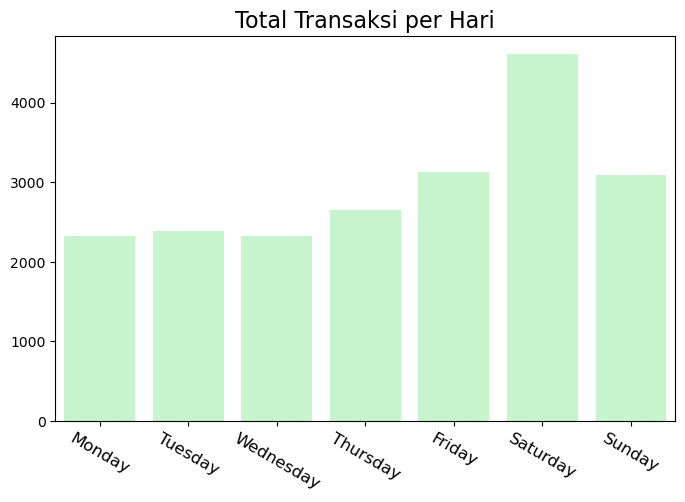

In [12]:
# transaksi tiap bulan

data_perday = df.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y=data_perday .values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi per Hari", size = 16)

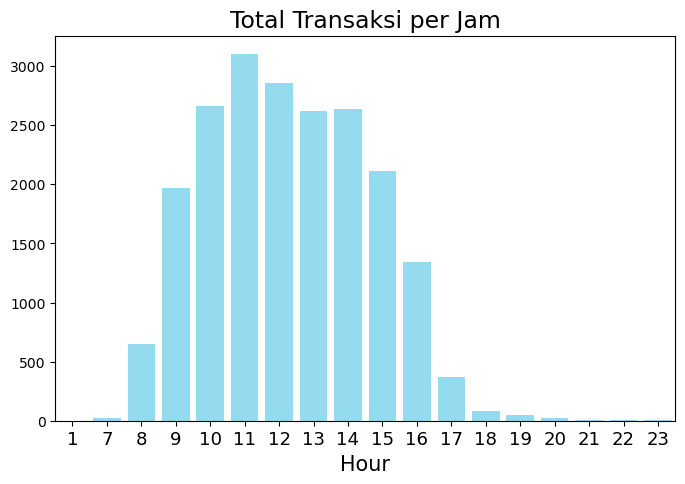

In [13]:
# Pembelian tiap jam
data_perhour = df.groupby('hour')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x=data_perhour.index,
    y=data_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.title("Total Transaksi per Jam", size = 17)
plt.xticks(size = 13)
plt.show()

In [15]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Menghapus transaksi yang tidak memiliki item (NaN atau 'NONE')
df = df.dropna(subset=['Item'])
df = df[df['Item'] != 'NONE']

# Mengelompokkan item per transaksi
transactions = df.groupby(['Transaction'])['Item'].apply(list).tolist()

# Mengonversi dataset ke format yang dapat digunakan oleh algoritma Eclat
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Menerapkan algoritma Eclat
frequent_itemsets = apriori(df_transformed, min_support=0.02, use_colnames=True)

# Menampilkan itemset yang sering muncul
print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Menampilkan asosiasi aturan
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Cake, Bread)
20  0.090016          (Coffee, Bread)
21  0.029160          (Pastry, Bread)
22  0.028104             (Tea, Bread)
23  0.054728           (Coffee, Cake)
24  0.023772              (Cak

In [16]:
rules.to_csv('Data/association_rules.csv', index=False)